In [20]:
from qiskit import *
import numpy as np
from qiskit.visualization import plot_histogram
import qiskit.tools.jupyter
from qiskit.tools.monitor import job_monitor
import matplotlib.pyplot as plt
import math

In [21]:
#QTF inversa
def qft_dagger(qc, n):
    for j in range(n//2): #SWAPS
        qc.swap(j, n - j - 1)
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), m, j) #R-controladas
        qc.h(j)

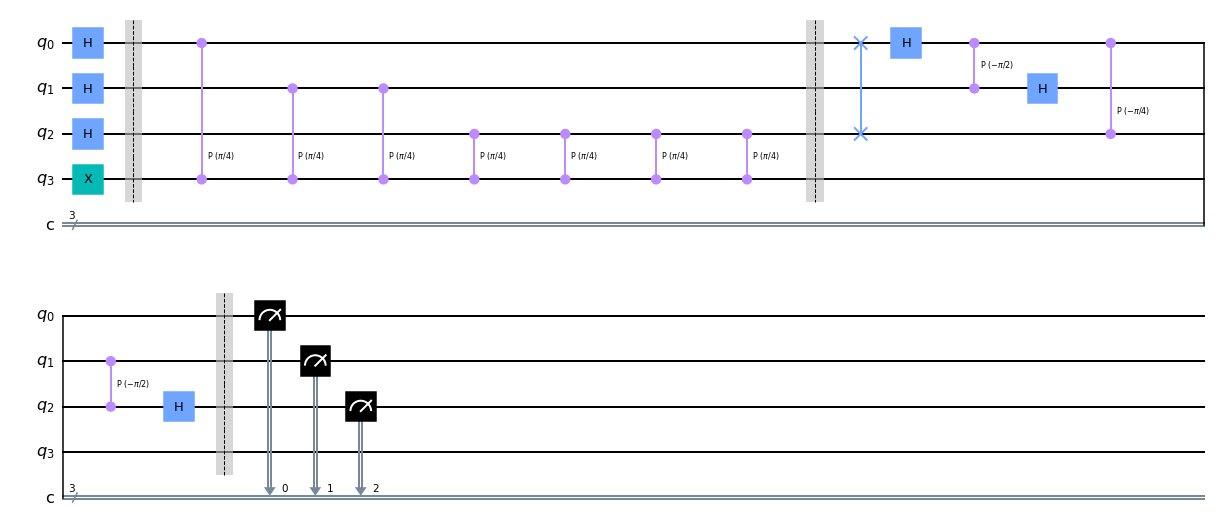

In [22]:
#Estimativa do autovalor para o autovetor ket 1

t = 3 #Número de qubits
fase = 1/8

QT1 = QuantumCircuit(t + 1, t)

for k in range(t):
    QT1.h(k)

#Autovetor ket 1
QT1.x(t)
QT1.barrier()

#U-controladas
angle = 2 * math.pi * fase
repetitions = 1
for counting_qubit in range(t):
    for i in range(repetitions):
        QT1.cp(angle, counting_qubit, t);
    repetitions *= 2
    
QT1.barrier()

qft_dagger(QT1, t) #QTF inversa
QT1.barrier()

#Medida do registrador 1
for k in range(t):
    QT1.measure(k, k)

QT1.draw('mpl')

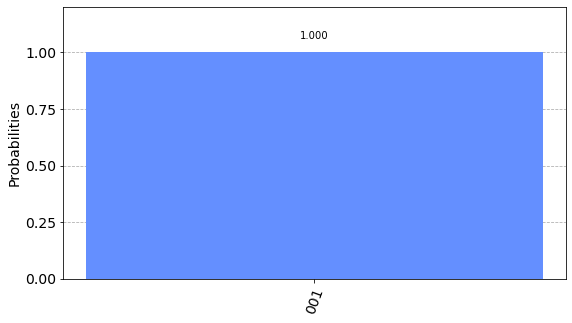

In [23]:
#Simulação
sim = Aer.get_backend('aer_simulator')
shots = 1000
count_QT1 = execute(QT1, sim, shots=shots).result().get_counts()
plot_histogram(count_QT1, figsize=(9,5))

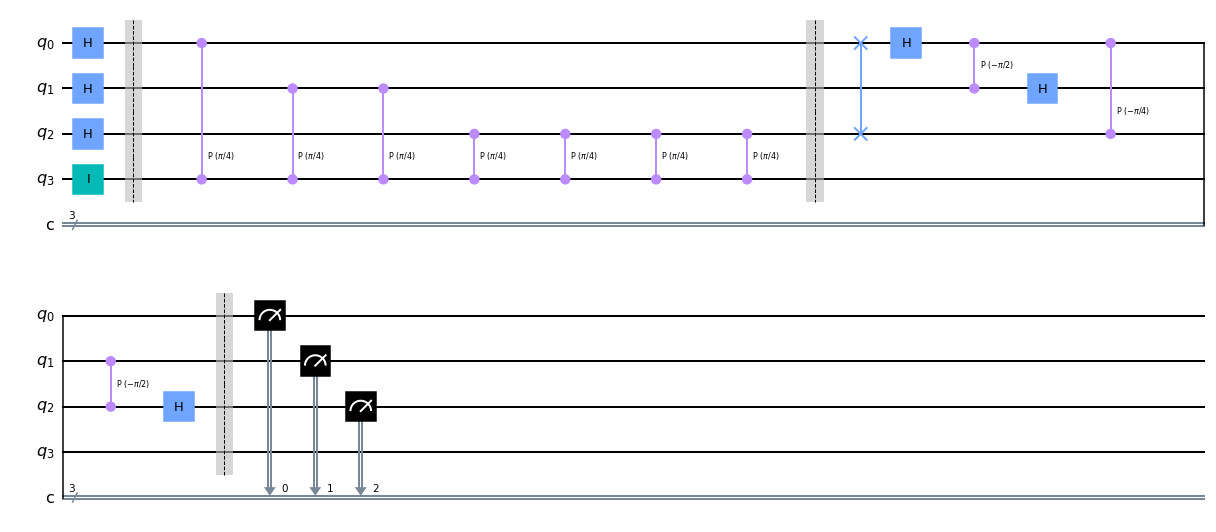

In [24]:
#Estimativa do autovalor para o autovetor ket 0

t = 3 #Número de qubits
fase = 1/8

QT0 = QuantumCircuit(t + 1, t)

for k in range(t):
    QT0.h(k)

#Autovetor ket 0
QT0.id(t)
QT0.barrier()

#U-controladas
angle = 2 * math.pi * fase
repetitions = 1
for counting_qubit in range(t):
    for i in range(repetitions):
        QT0.cp(angle, counting_qubit, t);
    repetitions *= 2
    
QT0.barrier()

qft_dagger(QT0, t) #QTF inversa
QT0.barrier()

#Medida do registrador 1
for k in range(t):
    QT0.measure(k, k)

QT0.draw('mpl')

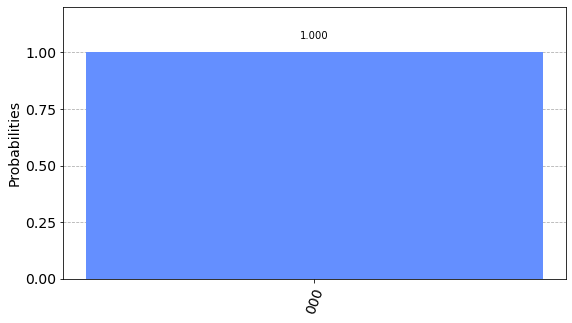

In [25]:
#Simulação
sim = Aer.get_backend('aer_simulator')
shots = 1000
count_QT0 = execute(QT0, sim, shots=shots).result().get_counts()
plot_histogram(count_QT0, figsize=(9,5))

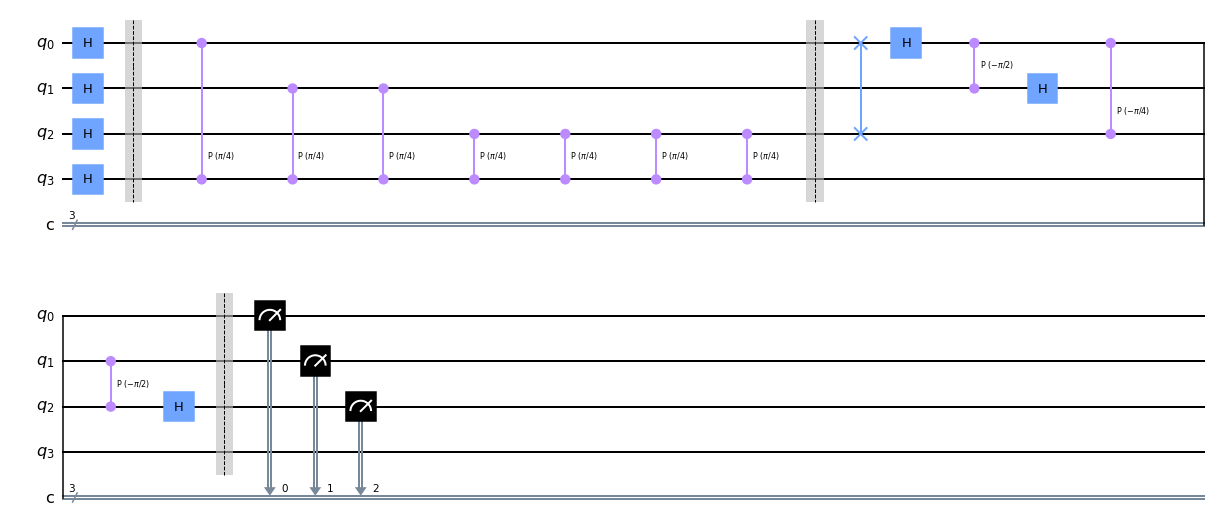

In [26]:
#Estimativa do autovalor para o autovetor ket +

t = 3 #Número de qubits
fase = 1/8

QTH = QuantumCircuit(t + 1, t)

for k in range(t):
    QTH.h(k)

#Autovetor ket +
QTH.h(t)
QTH.barrier()

#U-controladas
angle = 2 * math.pi * fase
repetitions = 1
for counting_qubit in range(t):
    for i in range(repetitions):
        QTH.cp(angle, counting_qubit, t);
    repetitions *= 2
    
QTH.barrier()

qft_dagger(QTH, t) #QTF inversa
QTH.barrier()

#Medida do registrador 1
for k in range(t):
    QTH.measure(k, k)

QTH.draw('mpl')

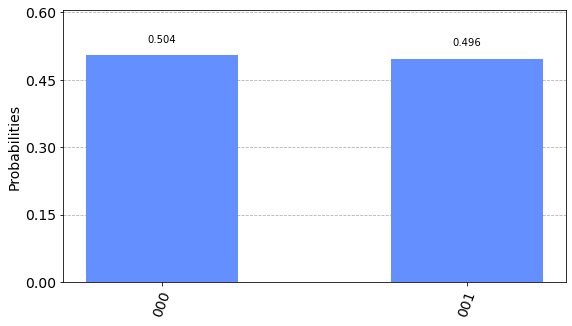

In [27]:
#Simulação
sim = Aer.get_backend('aer_simulator')
shots = 1000
count_QTH = execute(QTH, sim, shots=shots).result().get_counts()
plot_histogram(count_QTH, figsize=(9,5))

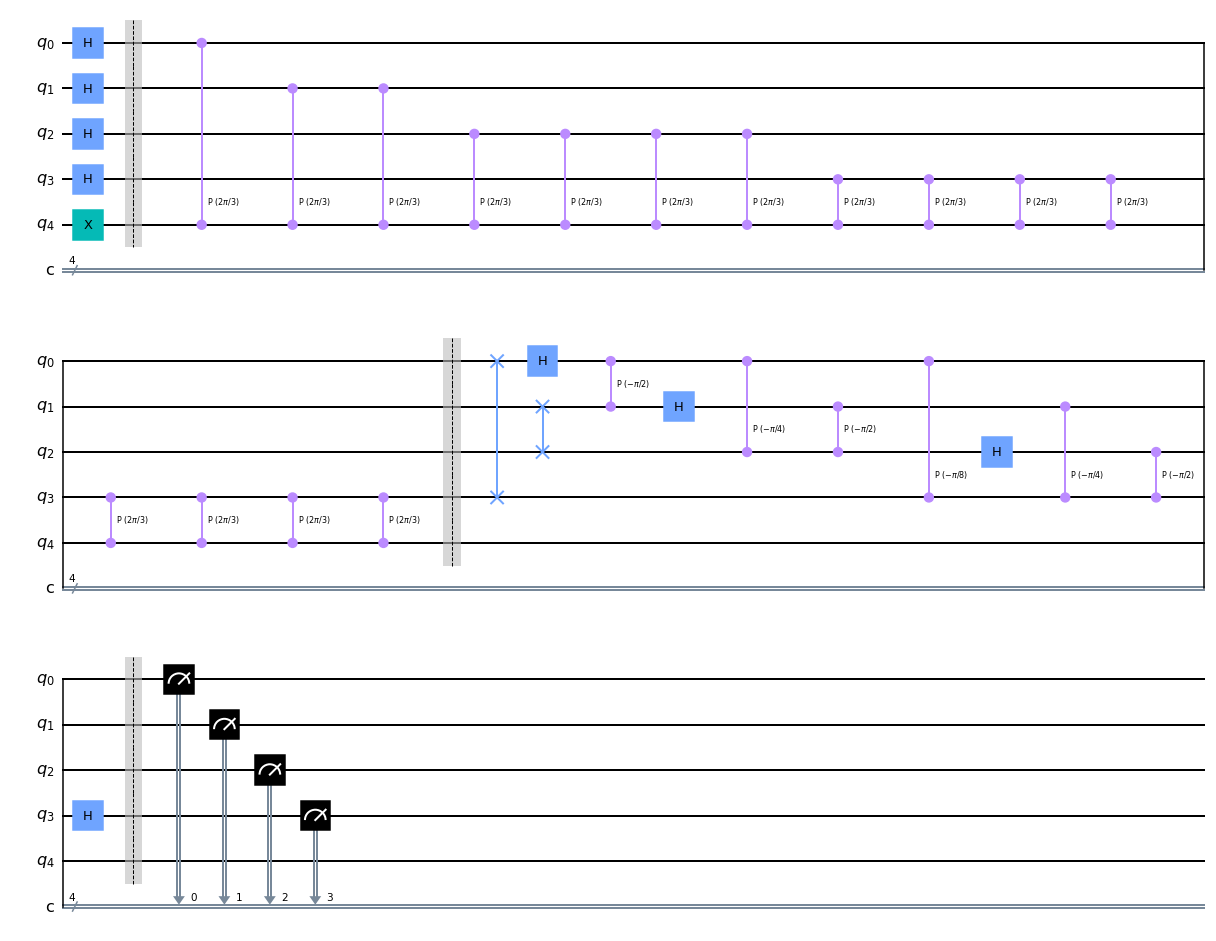

In [28]:
#Estimativa do autovalor para o autovetor ket 1

t = 4 #Número de qubits
fase = 1/3

qc4 = QuantumCircuit(t + 1, t)

for k in range(t):
    qc4.h(k)

#Autovetor ket 1
qc4.x(t)
qc4.barrier()

#U-controladas
angle = 2 * math.pi * fase
repetitions = 1
for counting_qubit in range(t):
    for i in range(repetitions):
        qc4.cp(angle, counting_qubit, t);
    repetitions *= 2
    
qc4.barrier()

qft_dagger(qc4, t) #QTF inversa
qc4.barrier()

#Medida do registrador 1
for k in range(t):
    qc4.measure(k, k)

qc4.draw('mpl')

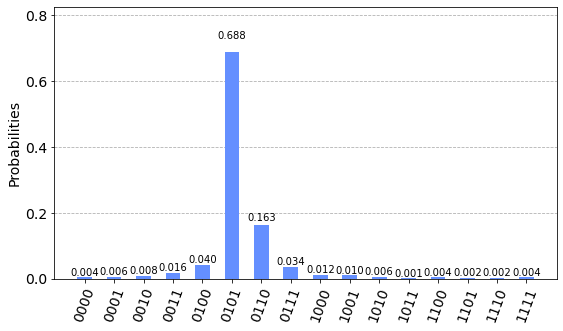

In [29]:
#Simulação
sim = Aer.get_backend('aer_simulator')
shots = 1000
count_qc4 = execute(qc4, sim, shots=shots).result().get_counts()
plot_histogram(count_qc4, figsize=(9,5))

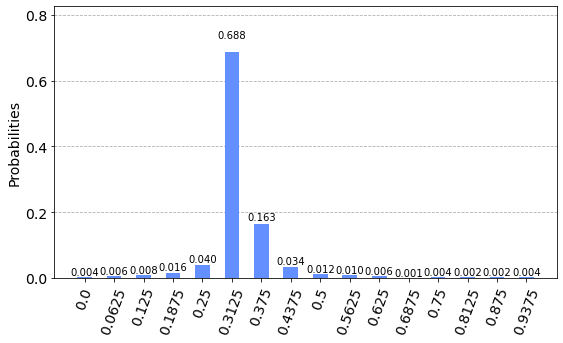

In [30]:
#Converter os valores de fase para decimal
phi_est = np.array([round(int(key, 2)/2**t, 6) for key in list(count_qc4.keys())])
key_new = list(map(str, phi_est))
count_new = dict(zip(key_new, count_qc4.values()))
plot_histogram(count_new, figsize=(9,5))

In [31]:
#Obtém a melhor estimativa, b
maior = 0
for k, v in count_new.items():
    if v/shots > maior:
        maior = v/shots
        b = k

b = float(b) 

n = 2
delta = 2**(-n) #Precisão arbitrada

ms = b + delta - 2**(-t) #Valor mais distante superior de b dentro da precisão arbitrada
mi = b - delta + 2**(-t) #Valor mais distante inferior de b dentro da precisão arbitrada

e = (ms - b) * 2**t #Tolerãncia de erro para a precisão arbitrada

print('e =', e)

e = 3.0


In [42]:
#Calcula a probabilidade de encontrar uma solução da precisão arbitrada
pobservada = 0
for k, v in count_new.items():
    if float(k) >= mi and float(k) <= ms:
        pobservada += v/1000
        
print('p =', pobservada, '-> probabilidade observada no experimento') 

plimite = 1 - 1 / (2 * (2**(t - n) - 2)) #Limite teórico inferior para a probabilidade com precisão delta e t qubits

print('p =', plimite, '-> limite inferior teórico')

p = 0.9610000000000001 -> probabilidade observada no experimento
p = 0.996031746031746 -> limite inferior teórico


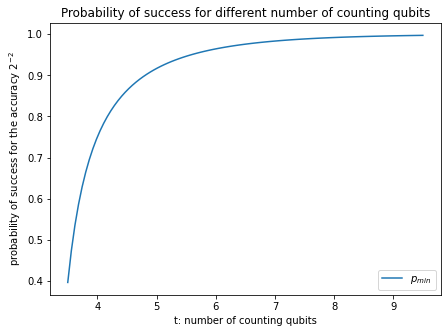

In [61]:
#Plota o número de qubits t em função da probabilidade de sucesso  
y = lambda t, n: 1-1/(2*(2**(t - n) - 2))
t_q = np.linspace(3.5, 9.5, 100 )
p_min = y(t_q, 2)
plt.figure(figsize=(7, 5))
plt.plot(t_q, p_min, label='$p_{min}$')
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-2}$')
plt.legend(loc='lower right')
plt.title('Probability of success for different number of counting qubits')
plt.show()

In [62]:
#Cria todos os circuitos para t = 4, 5, 6, 7, 8, 9
QT4 = QuantumCircuit(5, 4)
QT5 = QuantumCircuit(6, 5)
QT6 = QuantumCircuit(7, 6)
QT7 = QuantumCircuit(8, 7)
QT8 = QuantumCircuit(9, 8)
QT9 = QuantumCircuit(10, 9)

QT = [QT4, QT5, QT6, QT7, QT8, QT9]

#Laço para criação de os circuitos
for k in range(6):
    t = k + 4 #Inicia em t = 4 e vai até t = 9

    for j in range(t):
        QT[k].h(j)
     
    #Autovalor ket 1
    QT[k].x(t)
    QT[k].barrier()
    
    #U-controladas
    angle = 2 * math.pi * fase
    repetitions = 1
    for counting_qubit in range(t):
        for i in range(repetitions):
            QT[k].cp(angle, counting_qubit, t);
        repetitions *= 2
    
    QT[k].barrier()

    qft_dagger(QT[k], t) #QFT inversa
    QT[k].barrier()
    
    #Medida do registrador 1
    for j in range(t):
        QT[k].measure(j, j)


shots = 1000
job = execute(QT, sim, shots=shots)    
result = job.result().get_counts()

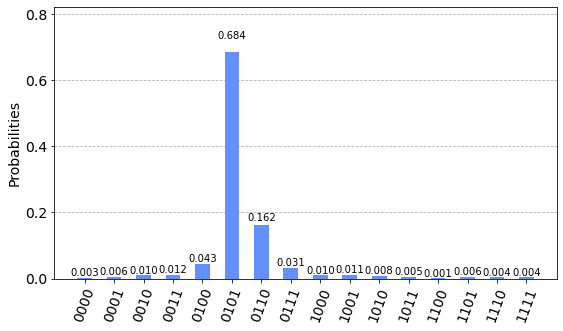

In [63]:
#t = 4
plot_histogram(result[0], figsize=(9,5))

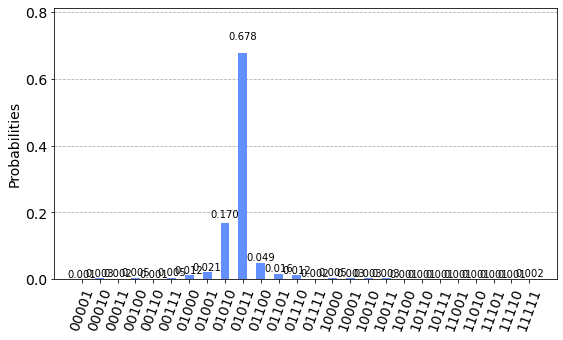

In [64]:
#t = 5
plot_histogram(result[1], figsize=(9,5))

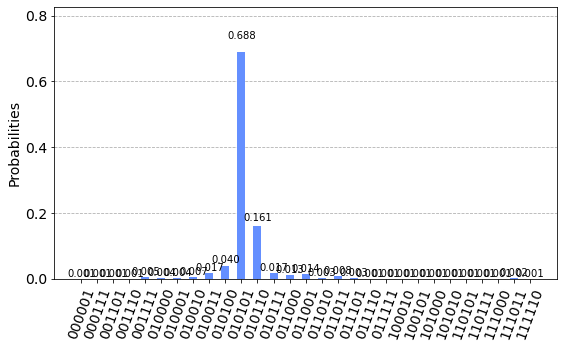

In [65]:
#t = 6
plot_histogram(result[2], figsize=(9,5))

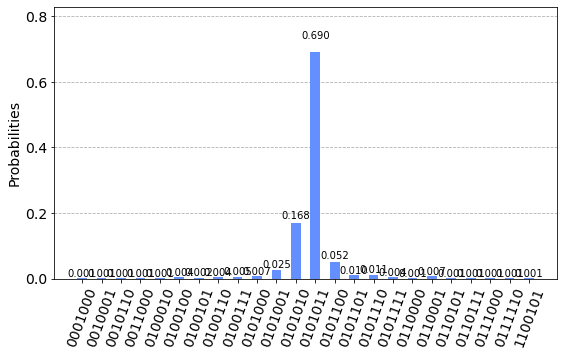

In [66]:
#t = 7
plot_histogram(result[3], figsize=(9,5))

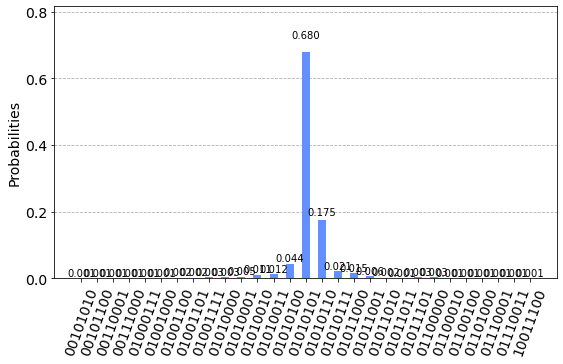

In [67]:
#t = 8
plot_histogram(result[4], figsize=(9,5))

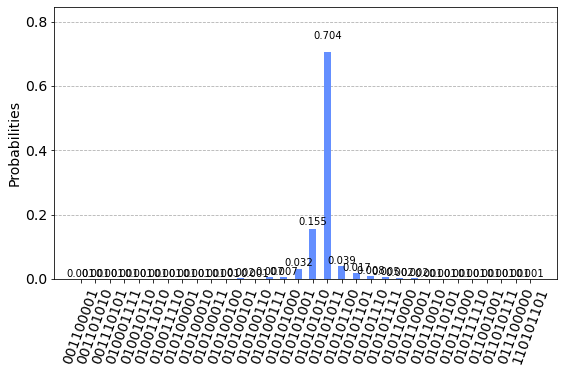

In [68]:
#t = 9
plot_histogram(result[5], figsize=(9,5))

In [71]:
#Obtém a melhor estimativa, b
maior = 0

e = [0, 0, 0, 0, 0, 0]
pobservada = [0, 0, 0, 0, 0, 0]
for j in range(6):
    t = j + 4 #Inicia em t = 4 e vai até t = 9
    
    #Converte para base decimal
    phi_est = np.array([round(int(key, 2)/2**t, 20) for key in list(result[j].keys())])
    key_new = list(map(str, phi_est))
    count_new = dict(zip(key_new, result[j].values()))
    
    #obtém a melhor estimativa, b
    for k, v in count_new.items():
        if v/shots > maior:
            maior = v/shots
            b = k
    
    b = float(b)

    n = 2
    delta = 2**(-n) #Precisão arbitrada

    ms = b + delta - 2**(-t) #Valor mais distante superior de b dentro da precisão arbitrada
    mi = b - delta + 2**(-t) #Valor mais distante inferior de b dentro da precisão arbitrada

    e[j] = (ms - b) * 2**t #Tolerãncia de erro para a precisão arbitrada
    
    #Calcula a probabilidade de encontrar uma solução da precisão arbitrada
    for k, v in count_new.items():
        if float(k) >= mi and float(k) <= ms:
            pobservada[j] += v/shots             


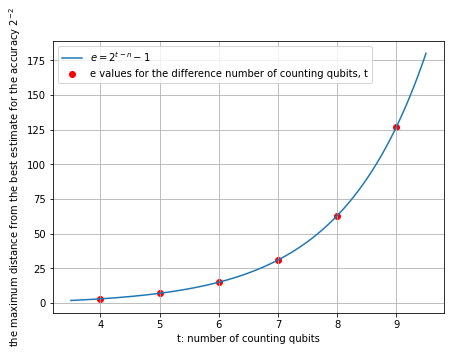

In [73]:
#Plota o número de qubits t em função da probabilidade de sucesso, pelo limite teórico e pelo resultado da simulação
y = lambda t, n: 2**(t - n) - 1
t_q = np.linspace(3.5, 9.5, 100)
p_min = y(t_q, 2)

plt.figure(figsize=(7, 5))
plt.plot(t_q, p_min, label='$e = 2^{t-n} - 1$')
x = [4, 5, 6, 7, 8, 9]
plt.scatter(x, e, color="red", label="e values for the difference number of counting qubits, t")
plt.xlabel('t: number of counting qubits')
plt.ylabel('the maximum distance from the best estimate for the accuracy $2^{-2}$')
plt.legend(loc='upper left')
plt.grid()
plt.show()

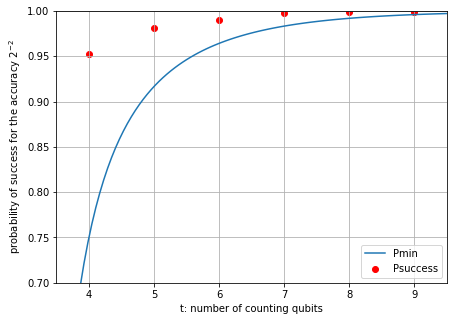

In [74]:
#Plota a o número de qubits t em função da probabilidade de sucesso  
y = lambda t, n: 1 - 1 / (2 * (2**(t - n) - 2))
t_q = np.linspace(3.5, 9.5, 100)
p_min = y(t_q, 2)

plt.figure(figsize=(7, 5))
plt.plot(t_q, p_min, label='Pmin')
x = [4, 5, 6, 7, 8, 9]
plt.scatter(x, pobservada, color="red", label="Psuccess")
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-2}$')
plt.legend(loc='lower right')
plt.axis([3.5, 9.5, 0.7, 1])
plt.grid()
plt.show()

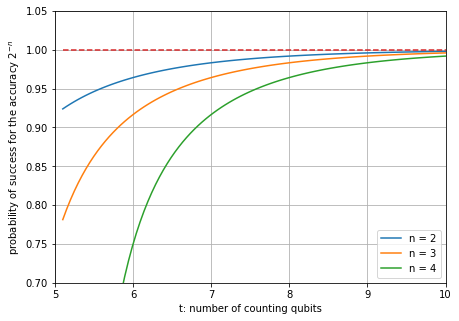

In [76]:
#Plota o número de qubits t em função da probabilidade de sucesso para n = 2, 3 e 4
t = np.linspace(5.1, 10, 100)
prob_success_n = [y(t, n) for n in [2, 3, 4]]
prob_n2, prob_n3, prob_n4  = prob_success_n[0], prob_success_n[1], prob_success_n[2]

plt.figure(figsize=(7, 5))
plt.plot(t, prob_n2, t, prob_n3, t, prob_n4, t, [1]*len(t),'--' )
plt.axis([5, 10, 0.7, 1.05])
plt.xlabel('t: number of counting qubits')
plt.ylabel('probability of success for the accuracy $2^{-n}$')
plt.legend(['n = 2', 'n = 3', 'n = 4'], loc='lower right')
plt.grid(True)

In [84]:
#Conecta com o IBMQ
IBMQ.save_account('4630a46ddeeecaaf473bbe95f6e50d9048dec69949743273d261d78019dc6947855bf53c5bfea2fee3db3a1a2fc663e4d57439d81a1526c9cbbc802662f0a602', overwrite=True)
provider = IBMQ.load_account()

#Computador quântico real
IBMQ.load_account()
provider = IBMQ.get_provider('ibm-q')
backend = provider.get_backend('ibmq_quito')

ibmqfactory.load_account:WARNING:2022-06-13 01:40:19,881: Credentials are already in use. The existing account in the session will be replaced.
ibmqfactory.load_account:WARNING:2022-06-13 01:40:24,339: Credentials are already in use. The existing account in the session will be replaced.


In [82]:
#Faz a transpilação para o computador quântico real N vezes
N = 200

maior = 0
menor = 1000
for k in range(N):
    transp = transpile(qc4, backend, optimization_level=3)
    if transp.depth() < menor: #Obtém a transpilação de menor depth
        circMin = transp
        menor = transp.depth()
    if transp.depth() > maior: #Obtém a transpilação de maior depth
        circMax = transp
        maior = transp.depth()        

CNOTmin = circMin.count_ops()['cx']
CNOTmax = circMax.count_ops()['cx']

print('Menor: Depth =', menor, " e CNOT = ", CNOTmin) 
print('Maior: Depth =', maior, " e CNOT = ", CNOTmax) 

Menor: Depth = 59  e CNOT =  33
Maior: Depth = 79  e CNOT =  41


In [85]:
#Simulação para o circuito de menor depth
job_ibm = backend.run(transpile(circMin, backend), shots=8192)
result_ibm = job_ibm.result()
real_counts = result_ibm.get_counts(circMin)
plot_histogram([real_counts, count_qc4], figsize=(9,5))

IBMQJobFailureError: 'Unable to retrieve result for job 62a6c01c29d69b354700d748. Job has failed: Internal Error. Error code: 9999.'

In [ ]:
#Circuito de menor depth
circMin.draw('mpl')

In [ ]:
#Simulação para o circuito de maior depth
job_ibm = backend.run(transpile(circMax, backend), shots=8192)
result_ibm = job_ibm.result()
real_counts = result_ibm.get_counts(circMax)
plot_histogram([real_counts, count_qc4], figsize=(9,5))

In [ ]:
#Circuito de maior depth
circMax.draw('mpl')